### Question 2

 In the simple birth and death process λn=λn and μn=μn for some constants λ and μ.
 
We can add immigration to this process, by assuming that during each interval of lengthh,there an individual will move into the population with probability νh. 

Here ν is constant independent of the population size. The deterministic model of the system has the formdndt= (λ−μ)n+ν.

Show that the mean of the of the corresponding stochastic model, ̄n, equals the solution ofthis differential equation, with an appropriate initial condition. 

Give an example to show that this is not true for more general birth and death processes with immigration, and illustratethe example numerically.

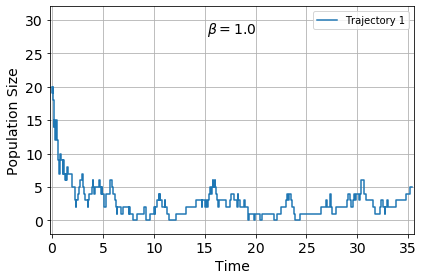

In [28]:
# Simple Birth and Death Process with Immigration

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


np.random.seed(98765)

# This function implements the more general BDI 

def birthdeathmigration(b, d, c, paths):
    X0 = 20 # initial population size
    N = 200 # maximal population size
    
    # Pre-allocation and initialization
    s = np.zeros((paths, N))
    X = np.zeros((paths, N))
    X[:,0] = X0
    s[:,0] = 0.00
    
    for j in range(tracks):
        i = 0
        while X[j,i] >= 0 and i < (N-1):
            U1 = np.random.rand()
            U2 = np.random.rand()
            h = - np.log(U1)/((b+d)*X[j,i]+c)
            s[j,i+1] = s[j,i] + h

            if U2 < b*X[j,i]/((b+d)*X[j,i]+c):
                X[j,i+1] = X[j,i] + 1 # a birth occurs
            elif U2 >= b*X[j,i]/((b+d)*X[j,i]+c)\
            and U2 < (b+d)*X[j,i]/((b+d)*X[j,i]+c): 
                X[j,i+1] = X[j,i] - 1 # a death occurs
            elif U2 >= (b+d)*X[j,i]/((b+d)*X[j,i]+c):
                X[j,i+1] = X[j,i] + 1 # immigration occurs
                
            i += 1
            
    return [X, s]


# dndt= (λ−μ)n+ν

def dn_dt(X, t):
    
    b = 0.5 # birth rate
    d = 1.0 # death rate
    c = 1.0 # immigration rate
    
    sol = ((b-d)*X)+c
    
    return sol


# this function implements the deterministic solution
# for the mean of the above stochastic model


def deterministic(X, s):
    
    X0 = X[:,0]
    mX = odeint(dn_dt, X0, s[0,:])
    
    return [s, mX]


## this solves and plots the BDI

def solve_and_plot(lmda, mu, vee, paths):    
    fig, ax = plt.subplots()
    
    X0 = 20 # initial population size
    N = 200 # maximal population size
    
    [population, interevent] = birthdeathmigration(b, d, c, tracks)
    [time, detSol] = deterministic(population, interevent)
    
    ## Sets axis ranges for plotting
    xmax = max([max(interevent[k,:]) for k in range(tracks)])
        
    ## Generates plots
    for r in range(tracks):
        plt.step(interevent[r,:], population[r,:], 
                 where='pre', label="Trajectory %s" % str(r+1))
        
    plt.axis([-0.2, xmax+0.2, -2, 32]) #ymax+2])
    ax.set_xlabel('Time', fontsize=14)
    ax.set_ylabel('Population Size', fontsize=14)
    plt.text(0.5, 0.9, '$\\beta = %s$' % c, fontsize=14, 
             horizontalalignment='center',
             verticalalignment='center', 
             transform=ax.transAxes)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.legend(loc=1)
    plt.grid(True)
    plt.show()
    
    ## Uncomment to save the figure
    #fig.savefig('Figures/bd_mig_1p0.png', dpi=600)


b = 0.5 # birth rate
d = 1.0 # death rate
c = 1.0 # immigration rate
tracks = 1

solve_and_plot(b, d, c, tracks)

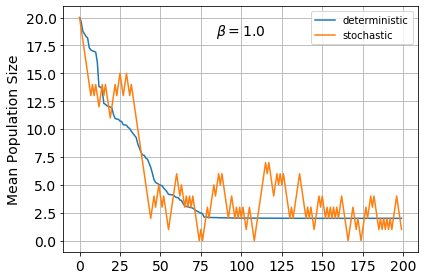

In [27]:
## Here I solve for mean from stochastic and compare with deterministic solution

[population, interevent] = birthdeathmigration(b, d, c, tracks)
[time, detSol] = deterministic(population, interevent)

fig, ax = plt.subplots()
lin1 = plt.plot(detSol, label='deterministic')



N = 1
cumsum, moving_aves = [0], []

for i, x in enumerate(population, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)
        
lin2 = plt.plot(moving_ave, label='stochastic')


ax.set_ylabel('Mean Population Size', fontsize=14)
plt.text(0.5, 0.9, '$\\beta = %s$' % c, fontsize=14, 
             horizontalalignment='center',
             verticalalignment='center', 
             transform=ax.transAxes)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.legend(loc="best")
plt.grid(True)
plt.show()

### This is clearly not true for the general birth process with immigration as illustrated above